In [153]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sb
import pandas.api.types as  ptypes
# from google.colab import files
# uploaded = files.upload()
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [154]:
# read weatherHistory.csv file
dataset = pd.read_csv("weatherHistory.csv")
dataset.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [155]:
dataset.dtypes

Formatted Date               object
Summary                      object
Precip Type                  object
Temperature (C)             float64
Apparent Temperature (C)    float64
Humidity                    float64
Wind Speed (km/h)           float64
Wind Bearing (degrees)      float64
Visibility (km)             float64
Loud Cover                  float64
Pressure (millibars)        float64
Daily Summary                object
dtype: object

In [156]:
# rename column Apparent Temperature
dataset.rename(columns={'Apparent Temperature (C)':'x','Humidity':'y'},inplace = True)

In [157]:
# getting column x and y in dataset
dataset = dataset.loc[:,['x','y']]
dataset.head()

,x,y
0,7.388889,0.89
1,7.227778,0.86
2,9.377778,0.89
3,5.944444,0.83
4,6.977778,0.83


In [158]:
dataset.describe()

,x,y
count,96453.000000,96453.000000
mean,10.855029,0.734899
std,10.696847,0.195473
min,-27.716667,0.000000
25%,2.311111,0.600000
50%,12.000000,0.780000
75%,18.838889,0.890000
max,39.344444,1.000000


In [159]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 2 columns):
x    96453 non-null float64
y    96453 non-null float64
dtypes: float64(2)
memory usage: 1.5 MB


In [160]:
# #check and remove skewness
# target = (np.square((dataset['y'])))
# print ('Skewness is', target.skew())
# print("Mean is",target.mean(), ", Median is ", target.median(), "\nwhich shows that column data are skewed data")
# dataset['y'] = target
# sb.distplot(dataset['y'])

In [161]:
# # check and remove outliers
# def remove_outlier(dataset):
#     low = .05
#     high = .95
#     quant_dataset = dataset.quantile([low, high])
#     for name in list(dataset.columns):
#         if ptypes.is_numeric_dtype(dataset[name]):
#             dataset = dataset[(dataset[name] > quant_dataset.loc[low, name]) & (dataset[name] < quant_dataset.loc[high, name])]
#     return dataset

# dataset = remove_outlier(dataset)
# sb.boxplot(dataset)

In [162]:
def feature_scaling(dataset):
    for name in dataset.columns:
        dataset[name] = (dataset[name] - dataset[name].min()) / (dataset[name].max()-dataset[name].min())
    return dataset

In [163]:
dataset = feature_scaling(dataset)

In [164]:
# splitting data for training and testing
test_data = dataset.tail(30).reset_index(drop=True)
test_data.head()

,x,y
0,0.816668,0.32
1,0.784691,0.51
2,0.746831,0.58
3,0.726700,0.64
4,0.710463,0.71


In [165]:
dataset = dataset.head(len(dataset)-30)
dataset.head()

,x,y
0,0.523486,0.89
1,0.521084,0.86
2,0.553144,0.89
3,0.501947,0.83
4,0.517356,0.83


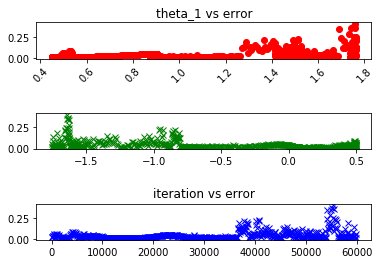

counter = 59999 and cost function = 0.049805088194349124
1.7355315012933517 -1.758270551119916
Accuracy: 73.38863363092784


In [166]:
class LinearRegression:
    theta_0 = 0.1
    theat_1 = 0.1
    def gradient_descent(self,learning_rate,theta_0,theta_1,epoch,x_data,y_data):
        cost = np.empty(0)
        h1 = h2 =0
        df_size = len(x_data)
        for i in  range(epoch):
            hypo = (theta_0 + (theta_1 * x_data[i]))

             # loss =  1/2m sum of (y^ - y)**2
            diff_pred = hypo-x_data

            # squaring each term
            loss = (diff_pred)**2
            loss_error_sum = loss.sum()
            loss_error_sum /= (2*df_size)

            h1 += (hypo - y_data[i])
            h2 += ((hypo - y_data[i]) * x_data[i])           
            theta_0 = theta_0 - ((learning_rate * h1) / df_size)
            theta_1 = theta_1 - ((learning_rate * h2) / df_size)
            if(i%100 == 0):
                plt.subplot(3,1,1)
                plt.title("theta_0 vs error")
                # plt.plot(counter,loss_error_sum, marker='x', color='r')
                plt.plot(theta_0,loss_error_sum,marker='o',color='r')
                plt.title('theta_1 vs error')
                plt.xticks(rotation=45)
                plt.subplot(3,1,2)
                plt.plot(theta_1,loss_error_sum,marker='x',color='g')
                plt.subplot(3,1,3)
                plt.title('iteration vs error')
                plt.plot(i,loss_error_sum,marker='x',color='b')

            if(loss_error_sum<=0.00009): 
                break
        plt.subplots_adjust(hspace=1.5)
        plt.show()
        print("counter = {} and cost function = {}".format(i, loss_error_sum))
        return theta_0,theta_1

    def test(self, x_test_data, theta_0, theta_1):
        y_predict = [0]*len(x_test_data)
        for i in range(len(x_test_data)):
    #             y_predict[i] = theta_1*x_test_data[i] + theta_0
              y_predict[i] = (theta_0 + (theta_1*x_test_data[i]))
        return y_predict

    def accuracy(self, y_test_data, y_predicted):
        diff = 0
        for i in range(len(y_test_data)):
            diff += abs((y_predicted[i] - y_test_data[i])/y_test_data[i])
        diff  =  (diff/len(y_test_data))
        data_accuracy = 1 - diff
        return data_accuracy*100       



def main():
    obj =LinearRegression()
    learning_rate = 0.01
    theta_0 = 0.5
    theat_1 = 0.5
    epoch = 60000
    
    x_train_data = np.array(dataset["x"])
    y_train_data = np.array(dataset["y"])

    x_test_data = np.array(test_data["x"])
    y_test_data = np.array(test_data["y"])
    
#     calculate gradient descent on train data for test data
    t_0, t_1= obj.gradient_descent(learning_rate,theta_0,theat_1,epoch,x_train_data,y_train_data)
    print(t_0,t_1)

#     test data over train data 
    y_prediction_test =obj.test(x_test_data,t_0,t_1)

#     get accuracy of predicted value to original value
    accuracy = obj.accuracy(y_test_data,y_prediction_test)


    print("Accuracy:",accuracy)

if __name__ == '__main__':
    main()